In [33]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [44]:
iris = load_iris()

In [45]:
data = pd.DataFrame(data = iris.data, columns=iris.feature_names)
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [46]:
data = data.drop(['sepal length (cm)', 'sepal width (cm)'], axis = 1)
data

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

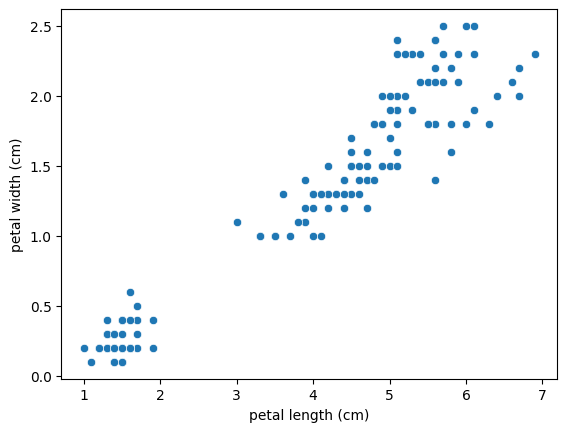

In [47]:
sns.scatterplot(data, x = 'petal length (cm)', y = 'petal width (cm)')

In [48]:
km = KMeans(n_clusters=3)

In [49]:
y_predicted = km.fit_predict(data)

c:\Users\Lumia520\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [50]:
data['cluster'] = y_predicted
data

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,1
146,5.0,1.9,1
147,5.2,2.0,1
148,5.4,2.3,1


<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

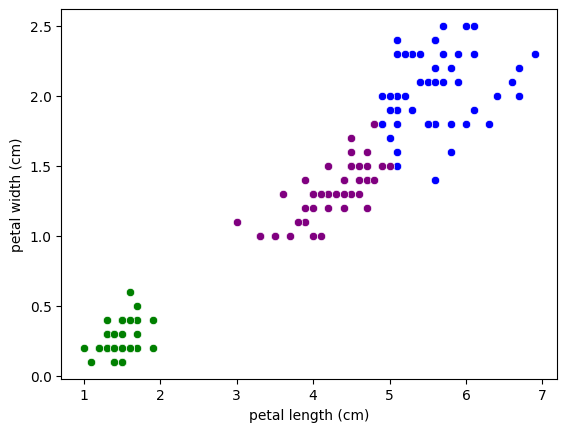

In [51]:
data0 = data[data.cluster == 0]
data1 = data[data.cluster == 1]
data2 = data[data.cluster == 2]

sns.scatterplot(data0, x = 'petal length (cm)', y = 'petal width (cm)', color = 'green')
sns.scatterplot(data1, x = 'petal length (cm)', y = 'petal width (cm)', color = 'blue')
sns.scatterplot(data2, x = 'petal length (cm)', y = 'petal width (cm)', color = 'purple')

In [53]:
sse = []
k_rng = range(1,10)

for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(data)
    sse.append(km.inertia_)

c:\Users\Lumia520\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Lumia520\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Lumia520\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Lumia520\AppData\Local\Programs\Python\Python311\Lib\site-packages\

<Axes: >

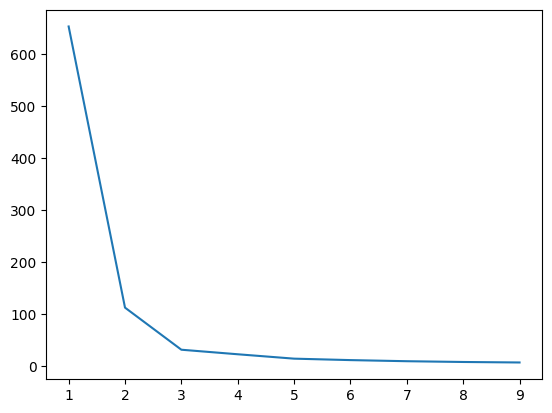

In [54]:
sns.lineplot(x = k_rng, y = sse)